In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import itemfreq
import glob

### RGB-Hist

In [2]:

#color = ('b','g','r')
#for i,col in enumerate(color):
#    histr = cv2.calcHist([img],[i],None,[256],[0,256])
#    plt.plot(histr,color = col)
#    plt.xlim([0,256])

#hist,bins = np.histogram(img.ravel(),256,[0,256])

#lets take a subset of the image
#img = img[0:300, 0:300]

def remove_noise(img, kernel1, kernel2):
    # load image, ensure binary, remove bar on the left
    input_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#    input_image = cv2.imread('calc.png', 0)
    input_image = cv2.threshold(input_image, 10, 255, cv2.THRESH_BINARY)[1]
    input_image_comp = cv2.bitwise_not(input_image)  # could just use 255-img

    hitormiss1 = cv2.morphologyEx(input_image, cv2.MORPH_ERODE, kernel1)
    hitormiss2 = cv2.morphologyEx(input_image_comp, cv2.MORPH_ERODE, kernel2)
    hitormiss = cv2.bitwise_and(hitormiss1, hitormiss2)

    indexes = np.argwhere(hitormiss > 0)

    for coordinate in indexes:
        img[coordinate[0]][coordinate[1]] = [0, 0, 0]

    return img

    # cv2.imshow('isolated.png', hitormiss)
    # cv2.waitKey()

#     img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     ret, mask = cv2.threshold(img_gray, 10, 255, cv2.THRESH_TOZERO)
# #    ret, binary_img = cv2.threshold(img_gray, 10, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU )
#
#     img = img[mask > 0]
#
#     return img_gray
    # kernel = np.array((
    #     [0, 0, 0],
    #     [0, 1, 0],
    #     [0, 0, 0]), dtype="int")

    #removes single pixels
    #output_image = cv2.morphologyEx(binary_img, cv2.MORPH_HITMISS, kernel)

    #if 1 in output_image[:, :]:
    #    return

    #rows, cols = img.shape
    #img_target = np.zeros((rows,cols), np.uint8)
    #img_target = img[output_image == 1]

    #return img_target

#     #roi = mask[0:rows, 0:cols]
#
#     #mask = np.array([[1,1,1,1],[1,0,0,1],[1,0,0,1],[1,1,1,1]])
#     #value = roi[0:4,0:4]
#
#     img1_bg = cv2.bitwise_and(value, value, mask=mask)
#
#     if 1 in img1_bg[:, :]:
#         return True;
#
#     h, w = img_gray.shape
#     # loop over the image, pixel by pixel
# #    for y in range(0, h):
# #        for x in range(0, w):



def find_sick_spots(img):
    a = [img[:, :, 1]]
    a = np.array(a).flatten()
    x = a[a > 50]

# average_color = [img[:, :, 1].mean() for i in range(img.shape[-1])]
    average_green_color = x.mean()
#    std_color = [img[:, :, i].std() for i in range(img.shape[-1])]
    std_color = x.std()

    multiplier = 1

    min_grn_color = average_green_color - std_color * multiplier

#    min_red_color = average_color[-1] - std_color[-1] * multiplier
#    min_grn_color = average_color[-2] - std_color[-2] * multiplier
#    min_blu_color = average_color[-3] - std_color[-3] * multiplier

#    img_red = img[:, :, 2]
#    img_grn = img[:, :, 1]
#    img_blu = img[:, :, 0]

    # grab the image dimensions
    h = img.shape[0]
    w = img.shape[1]

#    plt.imshow(img)
#    plt.show()

    # loop over the image, pixel by pixel
    for y in range(0, h):
        for x in range(0, w):
            # threshold the pixel
            # Test 1: is_bad_pixel = img[y, x][0] >= min_blu_color and img[y, x][1] >= min_grn_color and img[y, x][2] >= min_red_color
            is_bad_pixel = img[y, x][1] >= min_grn_color
            # \
            #               or img[y, x][1] < 50 \
            #               or (img[y, x][1] > img[y, x][2] and img[y, x][2] > img[y, x][0] and (img[y, x][2] - img[y, x][0] > 24)) \
            #
            #               or (img[y, x][1] > img[y, x][0] and img[y, x][0] > img[y, x][2] and (img[y, x][0] - img[y, x][2] > 24)) \
            #               or (img[y, x][2] > img[y, x][1] or img[y, x][0] > img[y, x][1])
            if is_bad_pixel:
                img[y, x] = [0, 0, 0]
    return img



for image_name in glob.glob("./test/*.jpg"):
   
    glob_img = cv2.imread(image_name)


    rows,cols,ch = glob_img.shape
    kernel_size = 50
    kernel_start_row = 0
    kernel_start_col = 0

    while kernel_start_row + kernel_size < rows:
     while kernel_start_col + kernel_size < cols:
         #kernel_image =
         find_sick_spots(glob_img[kernel_start_row: kernel_start_row+kernel_size,
                         kernel_start_col: kernel_start_col+kernel_size])
         kernel_start_col = kernel_start_col + kernel_size
     kernel_start_row = kernel_start_row + kernel_size
     kernel_start_col = 0

    #
    # plt.imshow(glob_img)
    # plt.show()
    #
    #
    #
    #         #img[y, x][0] = 0 if is_bad_pixel else img[y, x][0]
    #         #img[y, x][1] = 0 if img[y, x][1] >= min_grn_color else img[y, x][1]
    #         #img[y, x][2] = 0 if img[y, x][2] >= min_red_color else img[y, x][2]
    # # return the thresholded image
    #
    # #img_red[(img_red>min_red_color or img_grn>min_grn_color or img_blu>min_blu_color)] = 0
    # #img_grn[img_red>min_red_color or img_grn>min_grn_color or img_blu>min_blu_color] = 0
    # #img_blu[img_red>min_red_color or img_grn>min_grn_color or img_blu>min_blu_color] = 0
    #
    # #img[:,:,2] = img_red
    # #img[:,:,1] = img_grn
    # #img[:,:,0] = img_blu
    #
    #

    kernel1 = np.array([[0, 0, 0],
                        [0, 1, 0],
                        [0, 0, 0]], np.uint8)
    kernel2 = np.array([[1, 1, 1],
                        [1, 0, 1],
                        [1, 1, 1]], np.uint8)

    glob_img = remove_noise(glob_img, kernel1, kernel2)

    kernel1 = np.array([[0, 0, 0, 0],
                        [0, 1, 1, 0],
                        [0, 0, 0, 0]], np.uint8)

    kernel2 = np.array([[1, 1, 1, 1],
                        [1, 0, 0, 1],
                        [1, 1, 1, 1]], np.uint8)

    glob_img = remove_noise(glob_img, kernel1, kernel2)


    kernel1 = np.array([[0, 0, 0],
                        [0, 1, 0],
                        [0, 1, 0],
                        [0, 0, 0]], np.uint8)

    kernel2 = np.array([[1, 1, 1],
                        [1, 0, 1],
                        [1, 0, 1],
                        [1, 1, 1]], np.uint8)

    glob_img = remove_noise(glob_img, kernel1, kernel2)

    kernel1 = np.array([[0, 0, 0],
                        [0, 1, 0],
                        [0, 0, 0]], np.uint8)
    kernel2 = np.array([[1, 1, 1],
                        [1, 0, 1],
                        [1, 1, 1]], np.uint8)

    glob_img = remove_noise(glob_img, kernel1, kernel2)

    kernel1 = np.array([[0, 0, 0, 0],
                        [0, 1, 1, 0],
                        [0, 1, 1, 0],
                        [0, 0, 0, 0]], np.uint8)
    kernel2 = np.array([[1, 1, 1, 1],
                        [1, 0, 0, 1],
                        [1, 0, 0, 1],
                        [1, 1, 1, 1]], np.uint8)

    glob_img = remove_noise(glob_img, kernel1, kernel2)


    cv2.imwrite("./test_outputs/"+ image_name.split("/")[-1], glob_img)

    #
    # #hist = cv2.calcHist([img],[0],None,[256],[0,256])
    # #plt.hist(img.ravel(),256,[0,256]); plt.show()


In [15]:
for image_path in glob.glob('./test_outputs/*.jpg'):
    glob_img = cv2.imread(image_path)

    rows, cols, channels = glob_img.shape
    print(glob_img.shape)
    total_difference_gb = 0
    total_difference_gr = 0
    total_difference_rb = 0
    number_of_valid_pixels = 0
    number_of_wrong_pixels = 0

    arr_difference_gb = []
    arr_difference_gr = []
    arr_difference_rb = []

    for y in range(0, rows):
        for x in range(0, cols):
            b, g, r = glob_img[y][x]
            if b > 0 and g > 0 and r > 0:
                if g > r and r > b:
                    number_of_valid_pixels = number_of_valid_pixels + 1
                    # total_difference_gb = total_difference_gb + (g-b)
                    # total_difference_gr = total_difference_gr + (g-r)
                    # total_difference_rb = total_difference_rb + (r-b)
                    arr_difference_gb = np.append(arr_difference_gb, g - b)
                    arr_difference_gr = np.append(arr_difference_gr, g - r)
                    arr_difference_rb = np.append(arr_difference_rb, r - b)
                else:
                    number_of_wrong_pixels = number_of_wrong_pixels + 1
                    glob_img[y][x] = [0, 0, 0]

    gb_difference_mean = np.mean(arr_difference_gb)
    gr_difference_mean = np.mean(arr_difference_gr)
    rb_difference_mean = np.mean(arr_difference_rb)

    gb_difference_std = np.std(arr_difference_gb)
    gr_difference_std = np.std(arr_difference_gr)
    rb_difference_std = np.std(arr_difference_rb)

    print(gb_difference_mean, gr_difference_mean, rb_difference_mean)
    print(gb_difference_std, gr_difference_std, rb_difference_std)

    multipler = 0.5

    for y in range(0, rows):
        for x in range(0, cols):
            b, g, r = glob_img[y][x]
            if b > 0 and g > 0 and r > 0:
                if (g - b) > (gb_difference_mean + multipler * gb_difference_std) and \
                        (g - r) > (gr_difference_mean + multipler * gr_difference_std) and \
                        (r - b) > (rb_difference_mean + multipler * rb_difference_std):
                    glob_img[y][x] = [0, 0, 0]

    print(cv2.imwrite("./after_processed/"+ image_path.split("/")[-1], glob_img))

(388, 676, 3)
80.61970101066817 36.11933253790006 44.50036847276811
37.686384415601445 15.528181745795704 24.011351976247113
True
(388, 676, 3)
109.21875534766984 47.49289829444983 61.72585705322001
30.365875015890346 13.502885829418133 18.858835962393595
True
(495, 604, 3)
63.48230431822141 32.08090133172871 31.40140298649269
25.350058242220477 13.185607100090868 13.84663886504116
True
(460, 652, 3)
69.13974259513436 27.40693441546816 41.73280817966621
27.243938184774642 11.699795255489088 16.473873131154775
True
(500, 608, 3)
72.08933878157504 31.175248599839982 40.914090181735055
25.685797200015088 11.228969625001904 16.298988435068527
True
(741, 692, 3)
104.320852402746 26.020413806254766 78.30043859649123
24.52178898390878 12.103543277043935 18.743221296847935
True


### Remove Noise

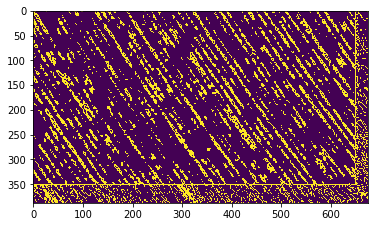

True


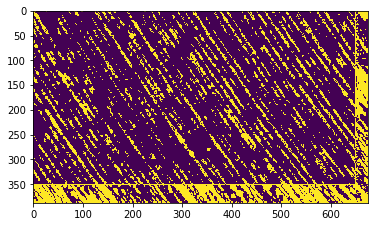

True


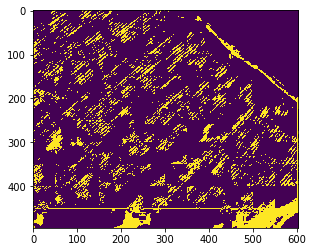

True


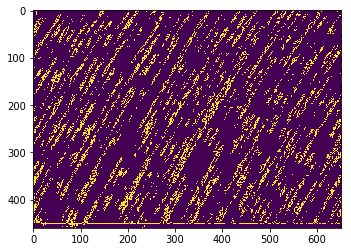

True


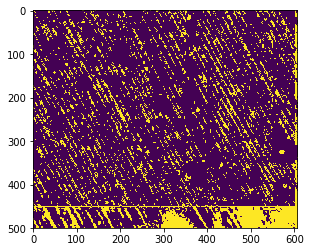

True


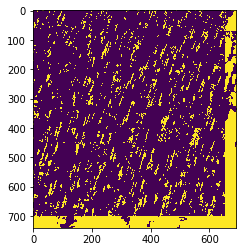

True


In [2]:
for image_path in glob.glob("./after_processed/*.jpg"):
    img = cv2.imread(image_path, 0)
    o_img = cv2.imread(image_path)
    bw = cv2.threshold(img, 10, 1,cv2.THRESH_BINARY)[1]
    plt.imshow(bw)
    plt.show()
    new_bw = np.zeros(bw.shape)
    size = 5
    ones = np.ones((size, size))
    for i, row in enumerate(range(bw.shape[0]-size)):
        for j, col in enumerate(range(bw.shape[1]-size)):
            value = np.mean(ones*bw[i:i+size, j: j+size])
            if value == 1:
                new_bw[i:i+size, j: j+size] = 1
    print(cv2.imwrite("./denoised/"+ image_path.split("/")[-1], new_bw*255))

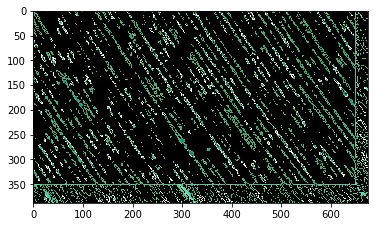

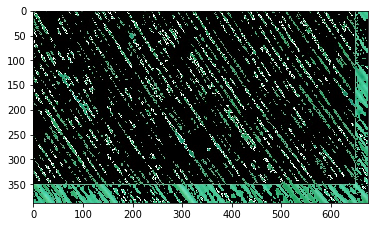

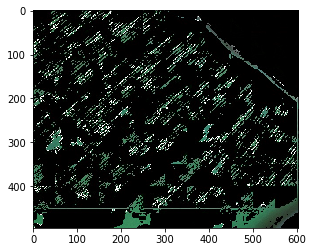

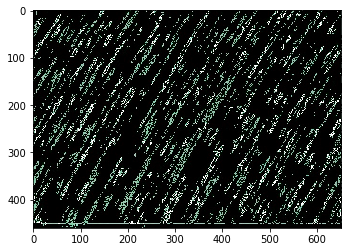

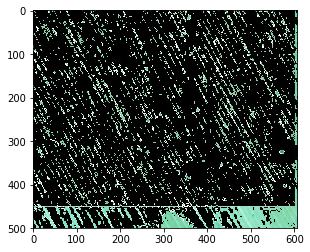

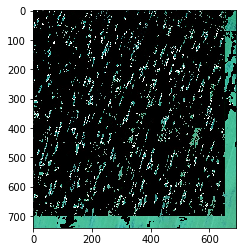

In [54]:
def remove_bad_contours(c, max_area):
    return not cv2.contourArea(c)==max_area

for image_path in glob.glob("./after_processed/*.jpg"):
    img = cv2.imread(image_path, 0)
    o_img = cv2.imread(image_path)
    bw = cv2.threshold(img, 10, 1,cv2.THRESH_BINARY)[1]
    image, contours, heir = cv2.findContours(np.array(bw, np.uint8),
                                             cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in sorted(contours, key=cv2.contourArea, reverse=True)[1:]:
        if cv2.contourArea(cnt)<10:
            continue
        x, y, w, h = cv2.boundingRect(cnt)
        crp_img = bw[y:y+h,x:x+w]
#         plt.imshow(crp_img)
#         plt.show()
        
        new_bw, crp_cnts, heir = cv2.findContours(crp_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        mask = np.ones(crp_img.shape[:2], dtype="uint8") 
        max_area = cv2.contourArea(sorted(crp_cnts, key=cv2.contourArea, reverse=True)[0])
#         print(max_area)
        # loop over the contours
        for c in crp_cnts:
            # if the contour is bad, draw it on the mask
            if remove_bad_contours(c, max_area):
                
                cv2.drawContours(mask, [c], -1, 0, -1)
        new_bw *= 255 

        crp_img = cv2.bitwise_and(new_bw, new_bw, mask=mask)
#         print(np.sum(crp_img/255))
#         plt.imshow(crp_img)
#         plt.show()
        if np.sum(crp_img/255) > .9*max_area:
            cv2.drawContours(o_img, cnt, -1, [255,255,255], 1)
        
#         new_bw, crp_cnts, heir = cv2.findContours(
#             np.array(crp_img, np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#         mask = cv2.drawContours(mask, sorted(crp_cnts, key=cv2.contourArea, reverse=True)[0], -1, 1, 3)
#         plt.imshow(mask)
#         plt.show()
#         mask1 = np.zeros(crp_img.shape[:2], dtype="uint8")
#         new_mask, crp_cnts_1, heir = cv2.findContours(
#             np.array(mask, np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#         mask1 = cv2.drawContours(mask1, sorted(crp_cnts_1, key=cv2.contourArea, reverse=True)[0],
#                                  -1, 1,2)
#         plt.imshow(mask1)
#         plt.show()
        
#         masked_bw = cv2.bitwise_and(crp_img, crp_img, mask=mask)
#         plt.imshow(masked_bw)
#         plt.show()
    plt.imshow(o_img)
    plt.show()
